In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

In [3]:
df = pd.read_csv(data_url)

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,410,410,411,413,414,414,418,418,422,426
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,102,119,120


In [5]:
df_columns = df.columns

In [6]:
cols_to_remove = df_columns[4:-1]
cols_to_remove

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20'],
      dtype='object')

In [7]:
val_col = df_columns[-1]
val_col

'3/7/20'

In [8]:
for col in cols_to_remove:
    df = df.drop([col], axis=1)

In [9]:
df.head()

,Province/State,Country/Region,Lat,Long,3/7/20
0,Anhui,Mainland China,31.8257,117.2264,990
1,Beijing,Mainland China,40.1824,116.4142,426
2,Chongqing,Mainland China,30.0572,107.8740,576
3,Fujian,Mainland China,26.0789,117.9874,296
4,Gansu,Mainland China,36.0611,103.8343,120


In [10]:
def set_area_name(region, state):
    if pd.isna(state):
        area_name = str(region)
    else:
        area_name = str(region) + ' ' + str(state)
    return area_name

df['geometry'] = df.apply(lambda x: Point([x['Long'], x['Lat']]) , axis=1)
df['area'] = df.apply(lambda x: set_area_name(x['Country/Region'], x['Province/State']), axis=1)

In [11]:
df = df[df[val_col] != 0]

In [12]:
df.head()

,Province/State,Country/Region,Lat,Long,3/7/20,geometry,area
0,Anhui,Mainland China,31.8257,117.2264,990,POINT (117.2264 31.8257),Mainland China Anhui
1,Beijing,Mainland China,40.1824,116.4142,426,POINT (116.4142 40.1824),Mainland China Beijing
2,Chongqing,Mainland China,30.0572,107.8740,576,POINT (107.874 30.0572),Mainland China Chongqing
3,Fujian,Mainland China,26.0789,117.9874,296,POINT (117.9874 26.0789),Mainland China Fujian
4,Gansu,Mainland China,36.0611,103.8343,120,POINT (103.8343 36.0611),Mainland China Gansu


In [13]:
gdf_crs = {'init': 'epsg:4326'}

gdf = gpd.GeoDataFrame(df, crs=gdf_crs)
countries = gpd.read_file('countries/ne_50m_admin_0_countries.shp')

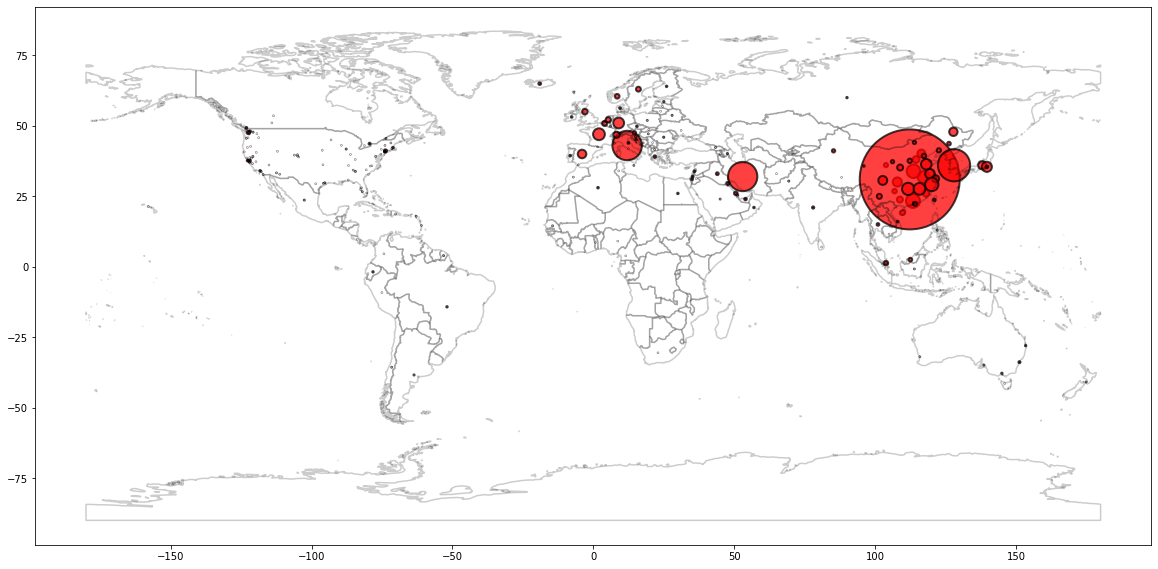

In [14]:
value_max = max(gdf[val_col].values)

markers = gdf[val_col].values / value_max * 10000

base = countries.boundary.plot(figsize=(20,15), color='black', alpha=0.2)
gdf.plot(ax=base, color='red', markersize=markers, linewidths=2, edgecolors='black', alpha=0.75)

In [15]:
markers_log = np.log(gdf[val_col].values) * 20

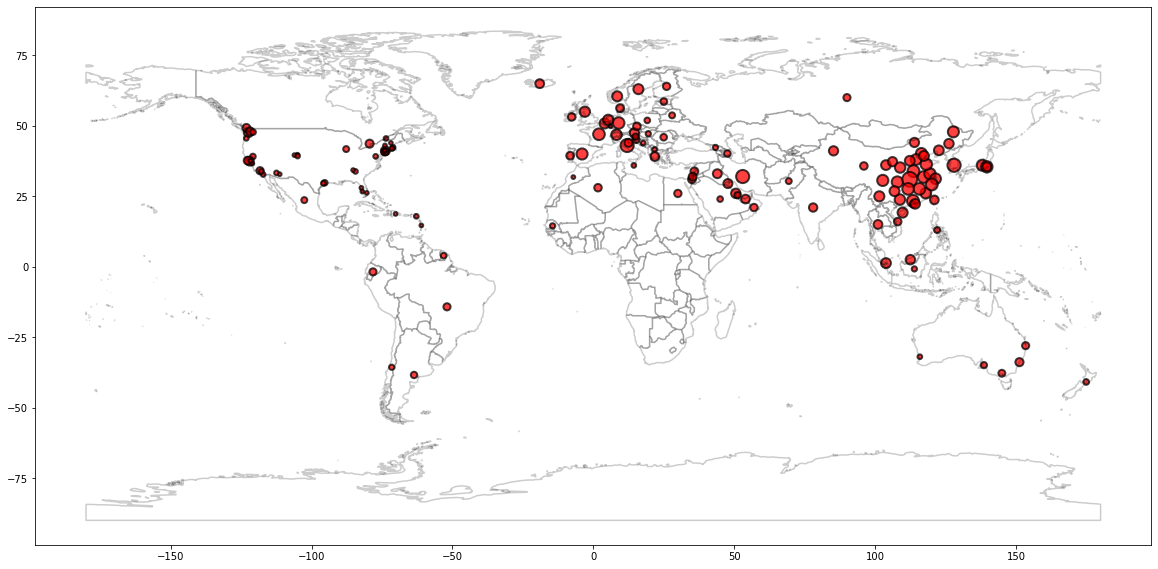

In [16]:
base = countries.boundary.plot(figsize=(20,15), color='black', alpha=0.2)
gdf.plot(ax=base, color='red', markersize=markers_log, linewidths=2, edgecolors='black', alpha=0.75)

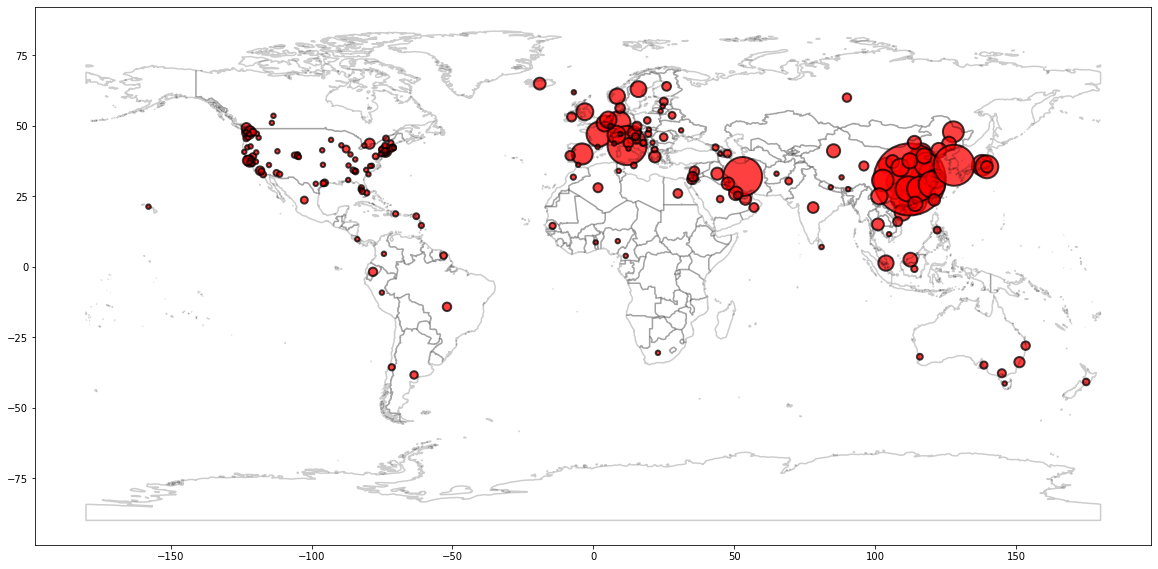

In [17]:
markers_sqrt = np.sqrt(gdf[val_col].values) * 20
base = countries.boundary.plot(figsize=(20,15), color='black', alpha=0.2)
gdf.plot(ax=base, color='red', markersize=markers_sqrt, linewidths=2, edgecolors='black', alpha=0.75)

In [18]:
chart_gdf = gdf[gdf['Country/Region'] != 'Mainland China']
chart_gdf = chart_gdf[chart_gdf['Country/Region'] != 'US']

value_max_chart = max(chart_gdf[val_col].values)

markers_chart = chart_gdf[val_col].values / value_max * 10000
markers_log_chart = np.log(chart_gdf[val_col].values) * 20
markers_sqrt_chart = np.sqrt(chart_gdf[val_col].values) * 20

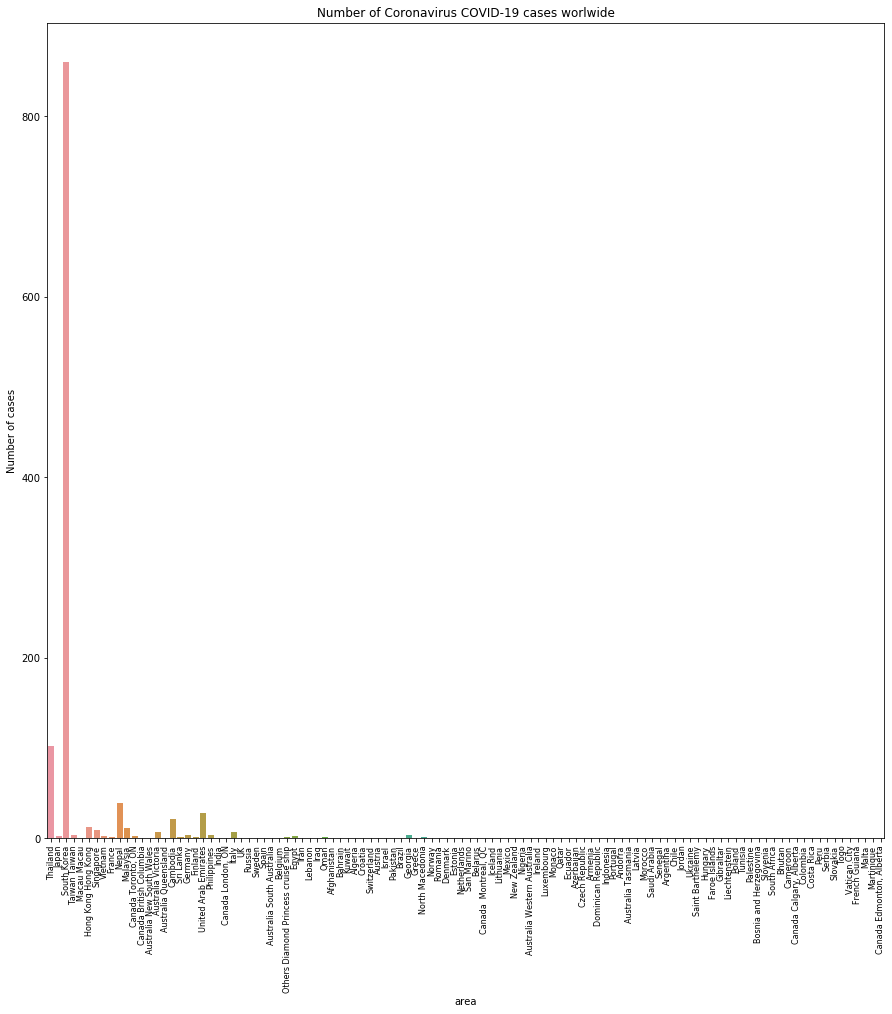

In [19]:
plt.figure(figsize=(15,15))
sns.barplot(x=chart_gdf['area'], y=markers_chart)
plt.title('Number of Coronavirus COVID-19 cases worlwide')
plt.ylabel('Number of cases')
plt.xticks(rotation=90, fontsize=8)
plt.show()

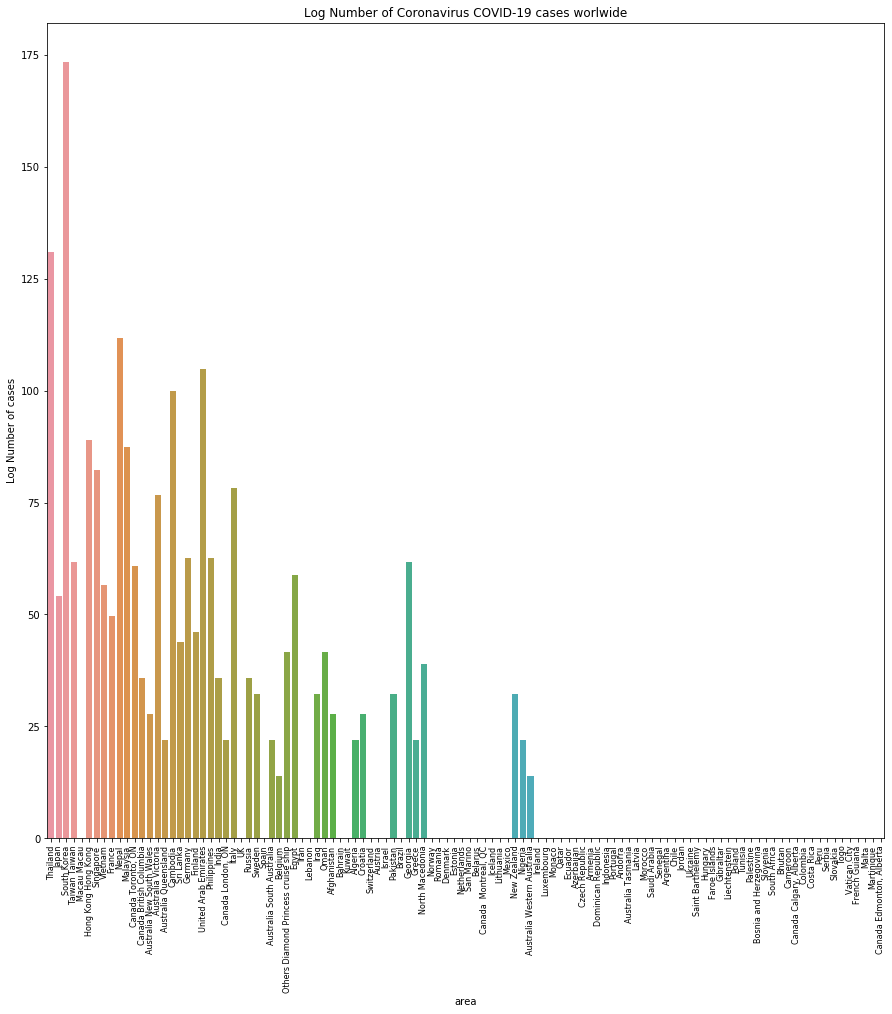

In [20]:
plt.figure(figsize=(15,15))
sns.barplot(x=chart_gdf['area'], y=markers_log_chart)
plt.title('Log Number of Coronavirus COVID-19 cases worlwide')
plt.ylabel('Log Number of cases')
plt.xticks(rotation=90, fontsize=8)
plt.show()

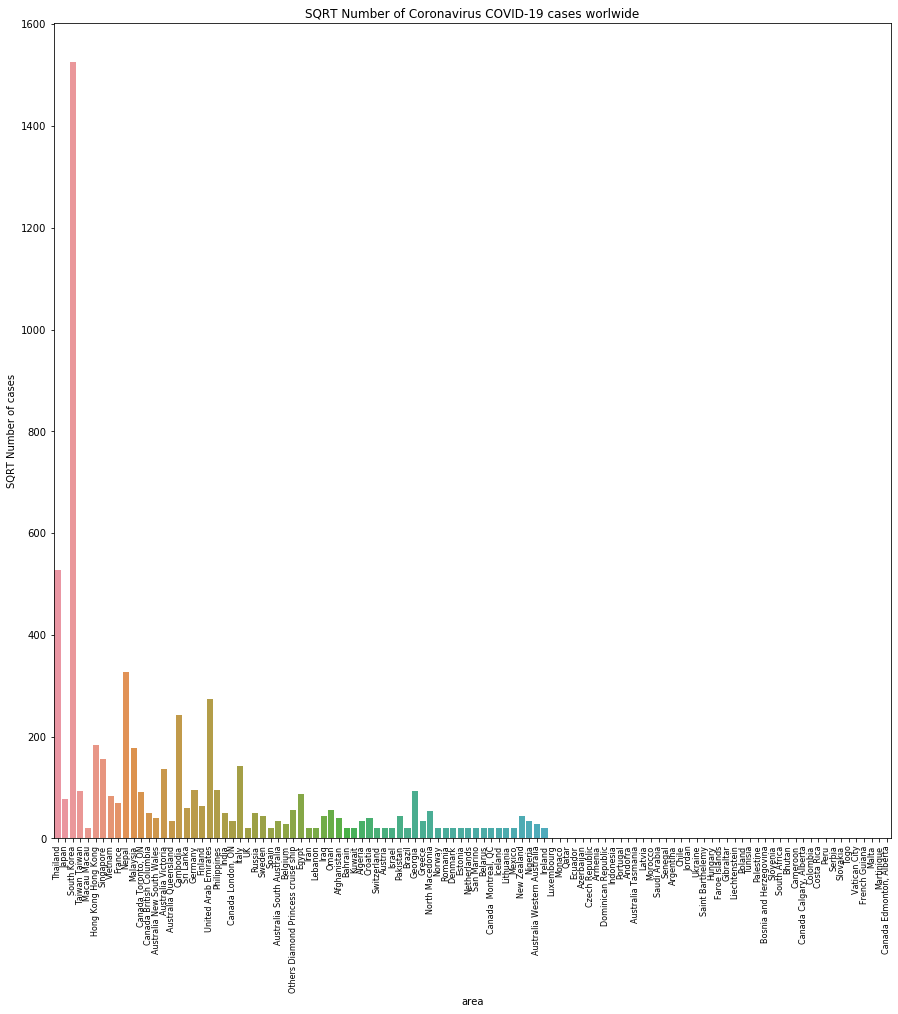

In [21]:
plt.figure(figsize=(15,15))
sns.barplot(x=chart_gdf['area'], y=markers_sqrt_chart)
plt.title('SQRT Number of Coronavirus COVID-19 cases worlwide')
plt.ylabel('SQRT Number of cases')
plt.xticks(rotation=90, fontsize=8)
plt.show()